https://x.com/umaruyama/status/1789512719655436728

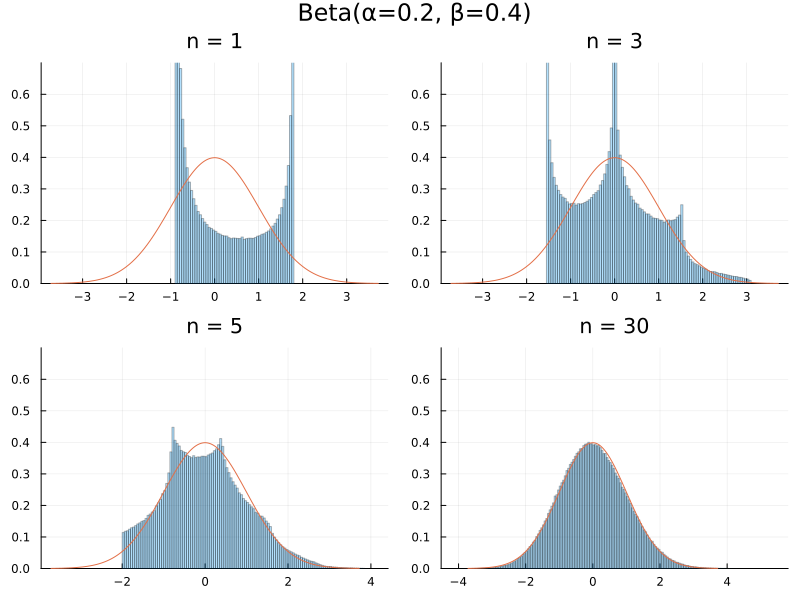

In [1]:
using Distributions
using Random
using StatsPlots
default(fmt=:png)

function plot_sim(dist, n; L=10^6, kwargs...)
    μ, σ = mean(dist), std(dist)
    Xtmp = zeros(eltype(dist), n)
    Z = zeros(L)
    for i in 1:L
        X = rand!(dist, Xtmp)
        Z[i] = √n * (mean(X) - μ) / σ
    end
    histogram(Z; norm=true, alpha=0.3, label="", kwargs...)
    plot!(Normal(); label="")
    title!("n = $n")
end

function plot_sims(dist;
        ns = (1, 3, 5, 30), 
        L = 10^6,
        ylim = (0, 0.7),
        dist_str = replace(string(dist), r"{[^}]*}"=>""),
        kwargs...)
    PP = []
    for n in ns
        P = plot_sim(dist, n; L, ylim, kwargs...)
        push!(PP, P)
    end
    plot(PP...; size=(800, 600), layout=(2, 2))
    plot!(plot_title=dist_str)
end

plot_sims(Beta(0.2, 0.4))

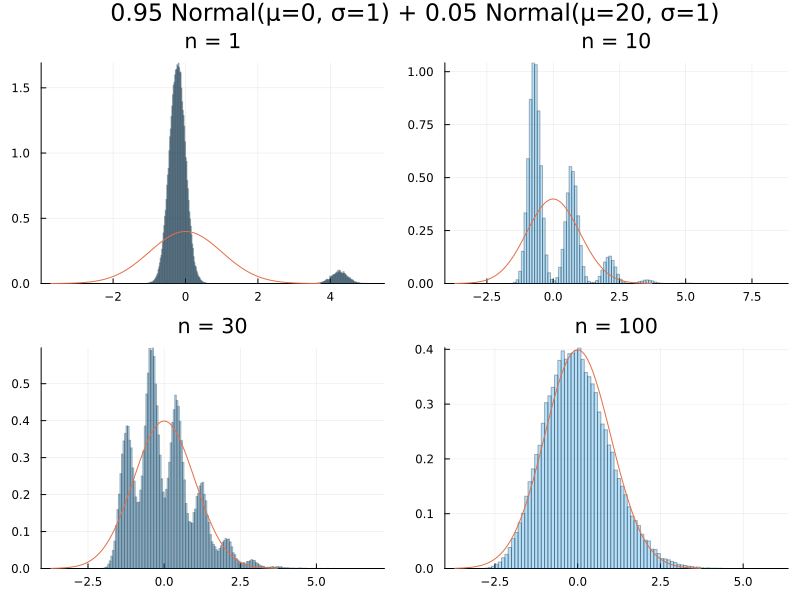

In [2]:
dist = MixtureModel([Normal(), Normal(20)], [0.95, 0.05])
dist_str = "0.95 Normal(μ=0, σ=1) + 0.05 Normal(μ=20, σ=1)"
plot_sims(dist; dist_str, L=10^5, ylim=:auto, ns=(1, 10, 30, 100))

See also

* https://x.com/genkuroki/status/1796738858991964564
* https://x.com/genkuroki/status/1818075348036370463